In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [3]:
train = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\Done\Logistic Regression\Logistic Regression\Titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\Done\Logistic Regression\Logistic Regression\Titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
test_passenger_ids = test['PassengerId']
df = pd.concat([train, test],axis=0, ignore_index=True)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#  Data Preprocessing

In [9]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Survived'] = df['Survived'].fillna(df['Survived'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [12]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,1,28.0,0,0,8.0500,2
1305,1306,0.0,1,0,39.0,0,0,108.9000,0
1306,1307,0.0,3,1,38.5,0,0,7.2500,2
1307,1308,0.0,3,1,28.0,0,0,8.0500,2


# Splitting Dataset

In [15]:
x = df.drop(['Survived'],axis=1)
y =df['Survived']

In [16]:
scaler = StandardScaler()

# Fit on training data and transform it
x = scaler.fit_transform(x)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8, random_state=42)

# Model Building

In [20]:
Model = LogisticRegression()
Model.fit(xtrain,ytrain)
ypred = Model.predict(xtest)
yprob = Model.predict_proba(xtest)[:, 1]

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(ytest, ypred)

array([[177,  12],
       [ 29,  44]], dtype=int64)

<Axes: >

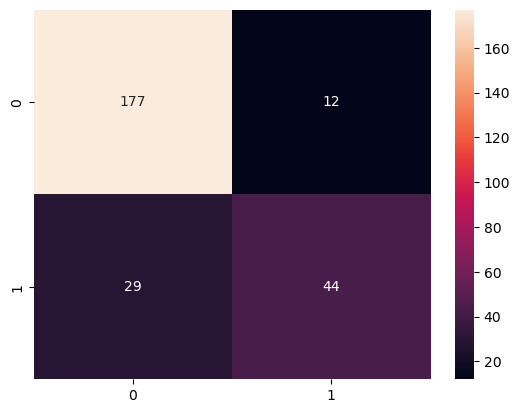

In [23]:
sns.heatmap(confusion_matrix(ytest, ypred), annot = True, fmt = 'g')

# Model Evaluation

In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       189
         1.0       0.79      0.60      0.68        73

    accuracy                           0.84       262
   macro avg       0.82      0.77      0.79       262
weighted avg       0.84      0.84      0.84       262



In [26]:
fpr, tpr, thresholds = roc_curve(ytest, yprob)
roc_auc = roc_auc_score(ytest, yprob)
roc_auc_score(ytest, yprob)

0.871421323476118

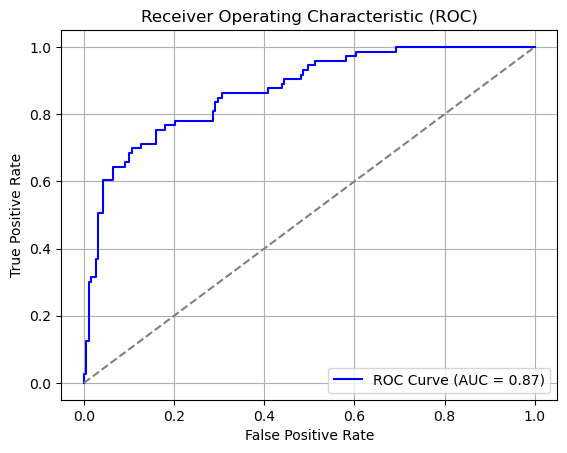

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Interpretation

In [29]:
x = sm.add_constant(x) 
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.383259
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Jul 2025   Pseudo R-squ.:                  0.3327
Time:                        05:00:35   Log-Likelihood:                -501.69
converged:                       True   LL-Null:                       -751.86
Covariance Type:            nonrobust   LLR p-value:                5.909e-103
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6229      0.097    -16.805      0.000      -1.812      -1.434
x1            -1.1699      0.

In [30]:
#Features x1 to x5 are the key drivers of survival — they lower the odds of survival as they increase.
#Features x6 to x8 are not statistically significant. You might consider dropping them unless they are theoretically important.


# Interview Questions:
- What is the difference between precision and recall?
- What is cross-validation, and why is it important in binary classification?


# What is the difference between precision and recall?
- Precision : Out of all data points how many data points are positively predicted correctly.
- Recall : Ability of model to predict all positive points correctly.

# What is cross-validation, and why is it important in binary classification?
- It is used to split the dataset into training and testing data.
- It is important in binary classification because it helps to aovid overfitting and provide better accuracy to the model.